### Decision Trees - Synthetic dataset

First we import the libraries we will need. In addition we will use the first code cell to activate the *inline* mode for the graphics generated by *matplotlib*. We also initialize the seed of the random generator. 

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#np.random.seed(19)

Now we will create a synthetic classification problem. The goal is to undestand the main concepts with this problem, after this we will analyze real databases. We will use the "make_blobs" function, which generates data from a specified number of blobs. The centers of the blobs are randomly chosen by this function.

The parameters we can play with are commented here:

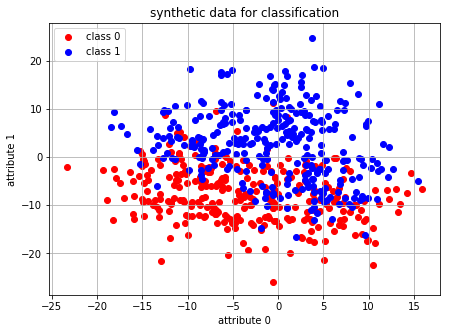

In [0]:
Nblobs_class0 = 3 # number of blobs
Nblobs_class1 = 3
nsamples_class0 = 300 # number of points to be generated in class 0
nsamples_class1 = 300 # number of points to be generated in class 1
nattributes = 2
blob_width = 5

class_names = ['class 0', 'class 1']
attributes_names = ['attribute 0', 'attribute 1']

X_class0, _ = make_blobs(random_state = 21,# changing this parameter will lead to different points
                         n_samples = nsamples_class0,
                         n_features = nattributes,
                         centers = Nblobs_class0, # number of blobs (clouds)
                         cluster_std = blob_width)

X_class1, _ = make_blobs(random_state = 23,# changing this parameter will lead to different points
                         n_samples = nsamples_class1,
                         n_features = nattributes,
                         centers = Nblobs_class1,  # number of blobs (clouds)
                         cluster_std = blob_width)

X = np.vstack((X_class0, X_class1))
y = np.zeros(nsamples_class0 + nsamples_class1)
y[nsamples_class0:] = 1

plt.figure(figsize=(7,5))
plt.scatter(X[y==0,0], X[y==0,1], color = 'r', label=class_names[0])
plt.scatter(X[y==1,0], X[y==1,1], color = 'b', label=class_names[1])
plt.grid()
plt.xlabel(attributes_names[0])
plt.ylabel(attributes_names[1])
plt.title('synthetic data for classification')
plt.legend(loc=2)
plt.show()


Now we will train a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier">
DecisionTreeClassifier</a>. The most important arguments for DecisionTreeClassifier builder are the following: 

- **criterion:** criterion for splitting the tree nodes. It can be 'gini' or 'entropy' (this last is equivalent to information gain).

- **max_depth:** maximum depth of the decision tree.

The examples reaching a tree node are used to compute statistics related
to estimate the quality of subsequent splittings at that node. The examples
are also used to compute statistics related to the class to be predicted
in case no further splittings are made. This number should be large enough
to ensure these statistics quality.
Thus requirements about the minimum amount of examples are needed:

- **min_samples_split:** minimum number of examples in a tree node required to be splitted.

- **min_samples_leaf:** minimum number of examples in a classification node


First we make a training set/test set partition of the database in order to properly validate the model. This allows to measure the predictive quality of the model by means of the scoring and the confusion matrix.

Try different parameters and respond to the questions made at the end.

In [0]:
from sklearn.model_selection import train_test_split

# training /test split
testsize = 0.3 # in the [0,1] range. 1: 100%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=5)

Now we construct the decision tree using the training partition:

In [0]:
#clf = DecisionTreeClassifier(criterion='gini',
#                             max_depth=None, min_samples_split=2, min_samples_leaf=1)
clf = DecisionTreeClassifier(criterion='gini', max_depth=2,
                             min_samples_split=100, min_samples_leaf=1)

clf = clf.fit(X_train, y_train)

Next cell is used to visualize the constructed decision tree:

In [0]:
#from graphviz import Source
from libreria_aux_arboles import tree_to_code, tree_to_pseudo

startbold = '\033[1m'
endbold = '\033[0m'

tree_to_code(clf, attributes_names, start_bold=startbold, end_bold=endbold)

#Source( export_graphviz(clf, out_file=None,
#                        feature_names=attributes_names,
#                        class_names=class_names,
#                        filled=True, rounded=True,
#                        special_characters=True))

def tree(attribute 0, attribute 1):
  if attribute 1 <= -0.6740654110908508:
    if attribute 0 <= -1.3779367208480835:
      return [[114.  13.]]
    else:  # if attribute 0 > -1.3779367208480835
      return [[77. 56.]]
  else:  # if attribute 1 > -0.6740654110908508
    if attribute 1 <= 2.683020234107971:
      return [[16. 28.]]
    else:  # if attribute 1 > 2.683020234107971
      return [[  9. 107.]]


In [0]:
# Predictive quality of the model

print("Score training = %f" % (clf.score(X_train, y_train)))
print("Score test = %f" % (clf.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix

print("\nConfusion matrix in test:\n")
print(confusion_matrix(y_test, clf.predict(X_test))) # row: real class; column: predicted class

Score training = 0.776190
Score test = 0.827778

Confusion matrix in test:

[[79  5]
 [26 70]]


In [0]:
def visualize_decision_frontiers(clf, X, y, attributes_names, class_names, limits=False):
    
    plot_step = 0.02
    if not limits:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    else:
        x_min, x_max, y_min, y_max = limits
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
    
    plt.plot(X[y==0,0], X[y==0,1], 'bo', label=class_names[0])
    plt.plot(X[y==1,0], X[y==1,1], 'ro', label=class_names[1])
    
    plt.xlabel(attributes_names[0])
    plt.ylabel(attributes_names[1])
    
    plt.legend(loc=2)

Now we show the classifier's decision frontiers and the training data on them:

In [0]:
from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression().fit(X_train, y_train)

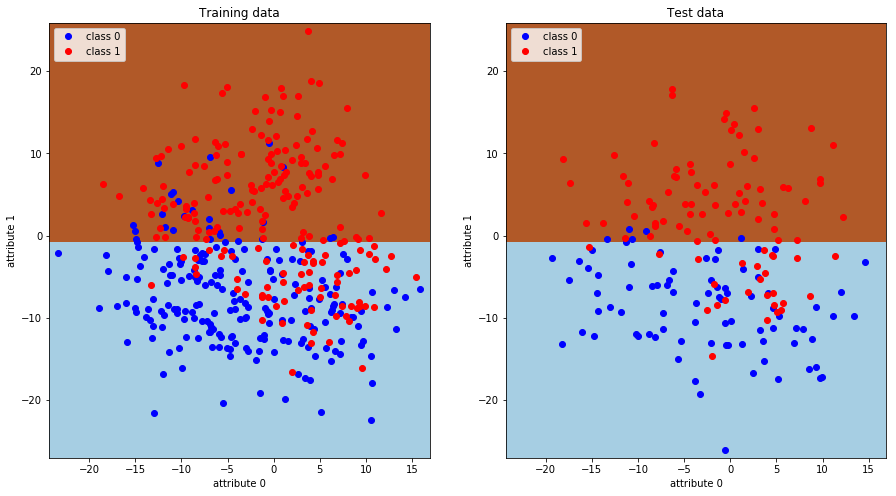

In [0]:
plt.figure(figsize=(15, 8))

limits = [ X[:,0].min()-1, X[:,0].max()+1, X[:,1].min()-1, X[:, 1].max()+1 ]

plt.subplot(1,2,1)
visualize_decision_frontiers(clf, X_train, y_train,
                             attributes_names, class_names, limits=limits)
plt.title('Training data')

plt.subplot(1,2,2)
visualize_decision_frontiers(clf, X_test, y_test,
                             attributes_names, class_names, limits=limits)
plt.title('Test data')
plt.show()

### Questions:


**(1)** Do we obtain different results if the *entropy* criterion is used to split the nodes, instead of *gini* criterion?

**(2)** Calculate the Gini value for the three first nodes in the tree and check if the values are the same as the values shown in the graphic. 

**(3)** Using *gini* criterion and *max_depth=None* (no limit in the depth) try *min_samples_split=2* and *min_samples_leaf=1* (independently). Try also decimal numbers instead of integers. What does it happen in each case? Did you expect it?

**(4)** Change the parameters Nblobs_class0, Nblobs_class1 and blob_width to check different problems with different difficulty levels: very simple and complex ones (with very overlapped classes). Does the tree structure reflect the complexity of the problem?

## Obtaining the set of rules equivalent to the tree

In [0]:
from my_library import get_rules_from_tree

rules = get_rules_from_tree(clf, attributes_names, class_names, X_test, y_test)

rules = list(rules.values())
for r in rules:
    print(r,"\n")

['(attribute 1 <= -0.6741) and (attribute 0 <= -1.3779)', [('class 0', 41, 0.8541666666666666), ('class 1', 7, 0.14583333333333334)]] 

['(attribute 1 <= -0.6741) and (attribute 0 > -1.3779)', [('class 0', 38, 0.6666666666666666), ('class 1', 19, 0.3333333333333333)]] 

['(attribute 1 > -0.6741) and (attribute 1 <= 2.6830)', [('class 0', 5, 0.19230769230769232), ('class 1', 21, 0.8076923076923077)]] 

['(attribute 1 > -0.6741) and (attribute 1 > 2.6830)', [('class 0', 0, 0.0), ('class 1', 49, 1.0)]] 



In [0]:
# Now we plot again the tree for comparing to the list of rules
tree_to_code(clf, attributes_names, start_bold=startbold, end_bold=endbold)
#Source( export_graphviz(clf, out_file=None,
#                        feature_names=attributes_names,
#                        class_names=class_names,
#                        filled=True, rounded=True,
#                        special_characters=True))

def tree(attribute 0, attribute 1):
  if attribute 1 <= -0.6740654110908508:
    if attribute 0 <= -1.3779367208480835:
      return [[114.  13.]]
    else:  # if attribute 0 > -1.3779367208480835
      return [[77. 56.]]
  else:  # if attribute 1 > -0.6740654110908508
    if attribute 1 <= 2.683020234107971:
      return [[16. 28.]]
    else:  # if attribute 1 > 2.683020234107971
      return [[  9. 107.]]


In [0]:
rules[0]

['(attribute 1 <= -0.6741) and (attribute 0 <= -1.3779)',
 [('class 0', 41, 0.8541666666666666), ('class 1', 7, 0.14583333333333334)]]

In [0]:
# same rules but ordered by probability of class
target_class = 'class 1'
rules.sort(key=lambda e: e[1][class_names.index(target_class)][2], reverse=True)

rules

[['(attribute 1 > -0.6741) and (attribute 1 > 2.6830)',
  [('class 0', 0, 0.0), ('class 1', 49, 1.0)]],
 ['(attribute 1 > -0.6741) and (attribute 1 <= 2.6830)',
  [('class 0', 5, 0.19230769230769232), ('class 1', 21, 0.8076923076923077)]],
 ['(attribute 1 <= -0.6741) and (attribute 0 > -1.3779)',
  [('class 0', 38, 0.6666666666666666), ('class 1', 19, 0.3333333333333333)]],
 ['(attribute 1 <= -0.6741) and (attribute 0 <= -1.3779)',
  [('class 0', 41, 0.8541666666666666), ('class 1', 7, 0.14583333333333334)]]]

In [0]:
clf.apply(X_train[0:10])

array([2, 6, 6, 6, 2, 3, 3, 2, 5, 2])

## Saving the tree and rules for future use

In [0]:
import pickle
with open("tree.b", 'wb') as f:
    pickle.dump(clf, f)
    pickle.dump(rules, f)